<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/BLGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

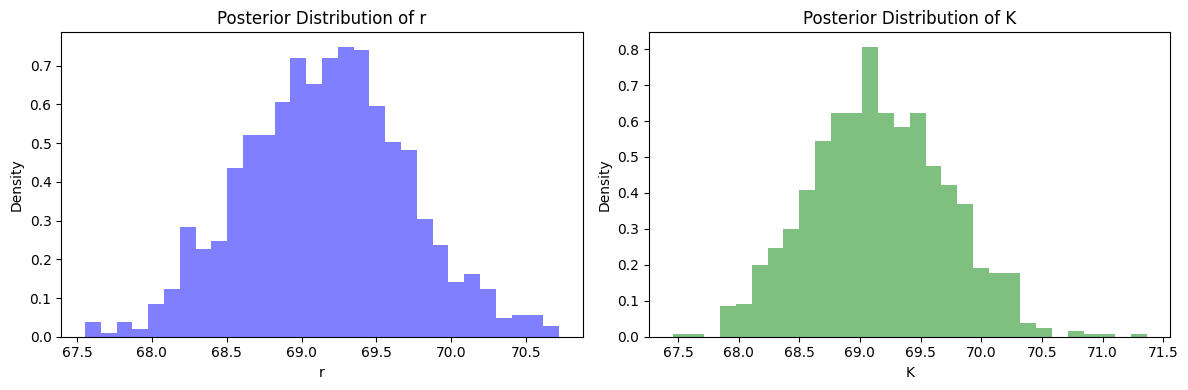

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Generate synthetic data for population growth
np.random.seed(0)
t = np.arange(1, 21)  # Time points
true_r = 0.1  # True intrinsic growth rate
true_K = 1000  # True carrying capacity
true_N = true_K / (1 + np.exp(-true_r * t))  # True population size
observed_N = np.random.poisson(true_N)  # Observed population size (with noise)

# Define the likelihood function (logistic growth model)
def logistic_growth(N, t, r, K):
    return r * N * (1 - N / K)

# Define the Gamma prior for the parameters r and K
alpha_r = 2  # Shape parameter for r
beta_r = 1  # Rate parameter for r
alpha_K = 2  # Shape parameter for K
beta_K = 1  # Rate parameter for K

# Perform Bayesian inference to estimate parameters
posterior_samples_r = gamma.rvs(alpha_r + observed_N.sum(), scale=1 / (beta_r + t.sum()), size=1000)
posterior_samples_K = gamma.rvs(alpha_K + observed_N.sum(), scale=1 / (beta_K + t.sum()), size=1000)

# Plot posterior distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(posterior_samples_r, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Posterior Distribution of r')
plt.xlabel('r')
plt.ylabel('Density')
plt.subplot(1, 2, 2)
plt.hist(posterior_samples_K, bins=30, density=True, alpha=0.5, color='green')
plt.title('Posterior Distribution of K')
plt.xlabel('K')
plt.ylabel('Density')
plt.tight_layout()
plt.show()
